In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Import all roads NL
map_df = gpd.read_file('karlsruhe/gis_osm_roads_free_1.shp')
# Show data format
map_df.head()

In [ ]:
# Set image properties
fig, ax = plt.subplots(1, figsize=(10,14))
map_df.plot(cmap='Wistia', ax=ax)
ax.axis('off')
plt.show()

# # Set coordinates to match Utrecht, change for your own city
# ax.set_xlim(5.1050, 5.1400)
# ax.set_ylim(52.0620, 52.1115)
# ax.set_aspect('equal')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
gt_df = pd.read_csv('data_odometry_poses\\dataset\\poses\\00.txt',
                    sep=' ', names=[f'col_{i}' for i in range(12)]) # ground truth data

times = pd.read_csv('dataset\\sequences\\00\\times.txt')
len(times)

4540

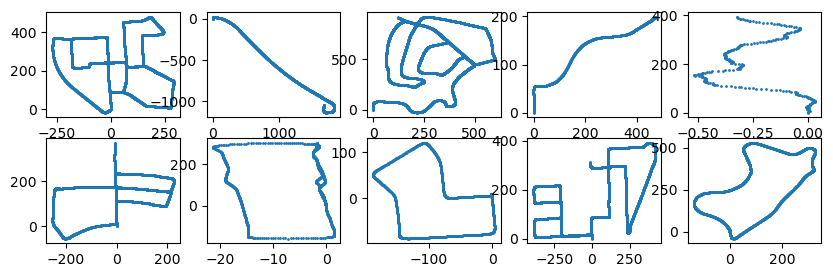

In [3]:
# I think the column index 3,7 and 11 do contain the infos of gps position
fig, axes = plt.subplots(figsize=(10, 3), nrows=2, ncols=5)
for i, ax in enumerate(axes.ravel()):
    df = pd.read_csv('data_odometry_poses\\dataset\\poses\\%02d.txt'%i, sep=' ')
    x = df.iloc[:,3]
    y = df.iloc[:,11]
    ax.scatter(x,y,s=1)
plt.show()

In [4]:
# i think the rest of the gps data contains the rotation information
import numpy as np
blueprint = np.arange(12).reshape(3,4)
display(blueprint)

Rt = df.to_numpy().reshape(-1,3,4)
R = Rt[:, :, :3] # rotation
t = Rt[:, :, 3] # translation

display(R.shape, t.shape)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

(1590, 3, 3)

(1590, 3)


 [[ 1.000000e+00  9.043680e-12  2.326809e-11  5.551115e-17]
 [ 9.043683e-12  1.000000e+00  2.392370e-10  3.330669e-16]
 [ 2.326810e-11  2.392370e-10  9.999999e-01 -4.440892e-16]]

 [[ 7.270826e-02  2.614764e-02 -9.970105e-01 -7.627305e+00]
 [-4.679329e-02  9.986448e-01  2.277805e-02 -7.130703e+00]
 [ 9.962549e-01  4.499724e-02  7.383326e-02  2.415979e+02]]

 [[-5.500654e-01  2.032669e-02  8.348742e-01 -1.746464e+02]
 [ 4.556859e-02  9.989449e-01  5.701999e-03  1.392669e-02]
 [-8.338774e-01  4.118050e-02 -5.504112e-01  2.170988e+02]]

 [[-6.056417e-01  3.876580e-02  7.947927e-01  1.059435e+02]
 [ 6.615622e-02  9.978077e-01  1.744020e-03 -5.417450e+00]
 [-7.929827e-01  5.363672e-02 -6.068785e-01  6.038059e+01]]

 [[ 5.959167e-01  4.341784e-02 -8.018717e-01  1.972529e+02]
 [-3.091400e-02  9.990375e-01  3.111955e-02 -1.369486e+01]
 [ 8.024510e-01  6.244404e-03  5.966852e-01  2.011456e+02]]

 [[ 5.358729e-01  5.677966e-03  8.442796e-01  1.674102e+02]
 [ 1.917432e-02  9.996376e-01 -1.889292

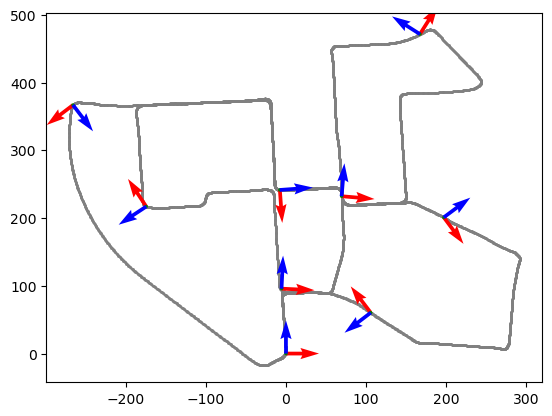

In [5]:
def draw_coordinate_frame_2d(ax, R,t):
    '''Projects the 3d coorindate frame represented by the rotation-matrix R
    and the translation-vector t into the 2d plane'''
    x_in_world, _, z_in_world = t 
    ihat_in_world, jhat_in_world, khat_in_world = R
    # note: the gps sensor is mounted s.t. the earth surface is repesented by the xz-plane, therefore we need 
    #       to project into this plane
    ax.quiver(x_in_world, z_in_world, ihat_in_world[0], ihat_in_world[2], scale=15, scale_units='width', color='red')
    ax.quiver(x_in_world, z_in_world, jhat_in_world[0], jhat_in_world[2], scale=15, scale_units='width', color='green')
    ax.quiver(x_in_world, z_in_world, khat_in_world[0], khat_in_world[2], scale=15, scale_units='width', color='blue')
    return ax


gt_df = pd.read_csv('data_odometry_poses\\dataset\\poses\\00.txt',
                    sep=' ', names=[f'col_{i}' for i in range(12)]) # ground truth data
times = pd.read_csv('dataset\\sequences\\00\\times.txt')

# # test the function
# fig, ax = plt.subplots()
# draw_coordinate_frame_2d(ax, R=np.eye(3), t=np.array([1,1,1]))
# plt.show()

# draw coordinate system onto map
fig, ax = plt.subplots()

x = gt_df.iloc[:,3]
y = gt_df.iloc[:,11]
ax.scatter(x,y,s=1, c='grey')
for t in np.linspace(0, len(times)-1, 9):
    Rt = gt_df.iloc[int(t)].to_numpy().reshape(3,4)
    print('\n', Rt)
    R, t = Rt[:, :3], Rt[:, 3]
    draw_coordinate_frame_2d(ax, R, t)
plt.show()

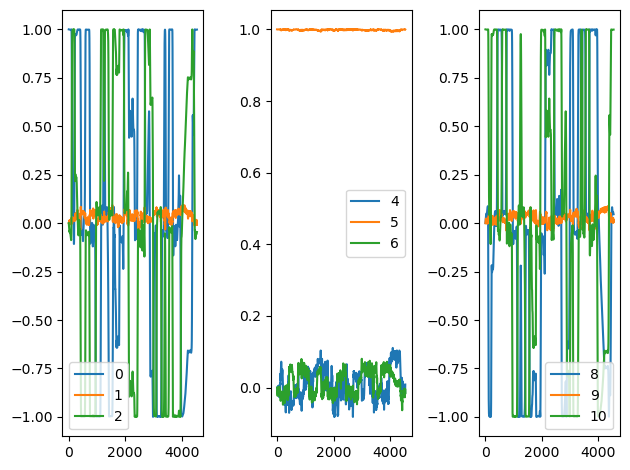

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
gt_df = pd.read_csv('data_odometry_poses\\dataset\\poses\\00.txt', sep=' ', names=[f'col_{i}' for i in range(12)])
times = pd.read_csv('dataset\\sequences\\00\\times.txt', header=None)

fig, axes = plt.subplots(nrows=1, ncols=3, squeeze=True)

for i in range(3):
    y = gt_df.iloc[:,i]
    x = range(len(y))
    axes[0].plot(x,y, label=str(i))
axes[0].legend()

for i in range(4,7):
    y = gt_df.iloc[:,i]
    x = range(len(y))
    axes[1].plot(x,y, label=str(i))
axes[1].legend()

for i in range(8,11):
    y = gt_df.iloc[:,i]
    x = range(len(y))
    axes[2].plot(x,y, label=str(i))
axes[2].legend()

plt.tight_layout()
plt.show()

display(np.arange(12).reshape(3,4))

In [ ]:
dt = times.diff().shift(-1).mean().to_numpy().squeeze()
print(dt)

In [ ]:
# plot all serieres against each other
gt_df = pd.read_csv('data_odometry_poses\\dataset\\poses\\00.txt',
                    sep=' ', names=[f'col_{i}' for i in range(12)])
n = gt_df.shape[1]

fig, axes = plt.subplots(figsize=(20,20), nrows=n+1, ncols=n+1)

for i in range(n+1):
    for j in range(n+1):
        ax = axes[i,j]
        if i==0 and j==0:
            pass
        elif (i==0 and j>0):
            y = gt_df.iloc[:,j-1]
            x = range(len(y))
            ax.plot(y,x,c='red')
        elif (j==0 and i>0):
            y = gt_df.iloc[:,i-1]
            x = range(len(y))
            ax.plot(y,x,c='red')
        else:
            y = gt_df.iloc[:,j-1]
            x = gt_df.iloc[:,i-1]
            ax.plot(x,y)
            ax.set_title(str(i-1) + '_' + str(j-1))         
plt.tight_layout()
plt.show()

In [ ]:
# visualize the driving 
import os
import matplotlib.pyplot as plt

dir = 'D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00'

dir_img0 = os.path.join(dir, 'image_0')
dir_img1 = os.path.join(dir, 'image_1')

fig, (ax0, ax1) = plt.subplots(figsize=(20,10), nrows=1, ncols=2)


for i in range(len(times)):
    file_name = '%06d.png'%i
    img0_path = os.path.join(dir, 'image_0', file_name)
    img1_path = os.path.join(dir, 'image_0', file_name)
    img0 = plt.imread(img0_path)
    img1 = plt.imread(img1_path)
    ax0.imshow(img0)
    ax1.imshow(img1)
    plt.pause(0.0001)
plt.show()